### Ejercicio 1

Una fábrica produce cuatro tipos de partes automotrices. Cada una de ellas primero se fabrica y luego se le dan los acabados. Las horas de trabajador requeridas y la utilidad para cada parte son las siguientes:

| Parte | A   | B   | C    | D   |
|-------|-----|-----|------|-----|
| **Tiempo de fabricación (hr/100 unidades)** | 2.5 | 1.5 | 2.75 | 2   |
| **Tiempo de acabados (hr/100 unidades)**    | 3.5 | 3   | 3    | 2   |
| **Utilidad ($/100 unidades)**               | 375 | 275 | 475  | 325 |

Las capacidades de los talleres de fabricación y acabados para el mes siguiente son de 640 y 960 horas, respectivamente. Determinar mediante un algoritmo PSO con restricciones (sin usar bibliotecas para PSO) qué cantidad de cada parte debe producirse a fin de maximizar la utilidad y resolver las siguientes consignas:


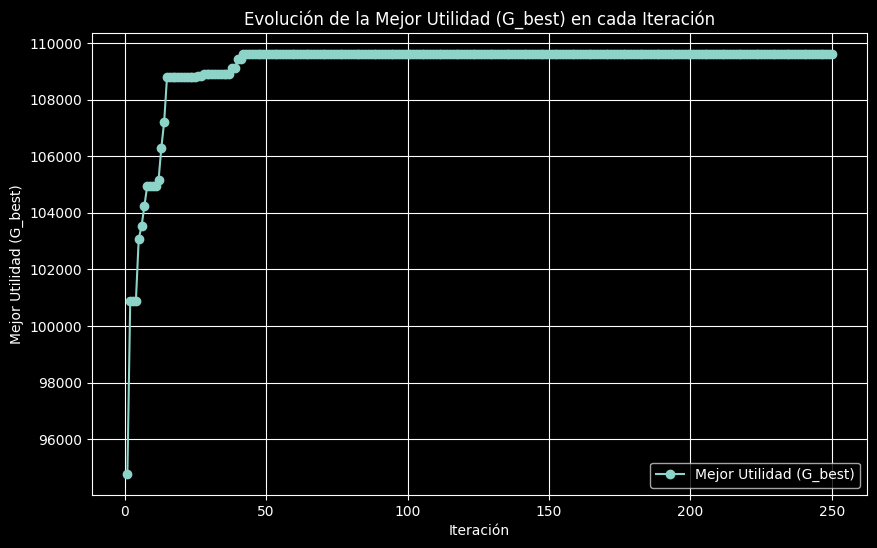

Mejor configuración encontrada:
A: 8 unidades
B: 98 unidades
C: 100 unidades
D: 99 unidades
Capacidad de fabricación usada: 640.0/640
Capacidad de acabado usada: 820.0/960
Utilidad máxima alcanzada: 109625.00


In [30]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Definimos una función para llamarla con distintos parámetros:
def pso_optimizacion(fabricacion, acabados, utilidad, capacidad_fabricacion, capacidad_acabados, num_particulas, max_iter, w, c1, c2):
    partes = ['A', 'B', 'C', 'D'] # <- Las partes definidas en el enunciado

    # Inicializamos las partículas:
    X = np.random.randint(0, 200, (num_particulas, len(partes)))  # Posiciones de las partículas (número de unidades de cada parte), uniformem
    V = np.zeros_like(X)  # Velocidades de las partículas
    P_best = X.copy()     # Mejores posiciones personales
    G_best = X[np.argmax([np.dot(utilidad, P_best[i]) for i in range(num_particulas)])]  # Mejor posición global

    # Almacenar la evolución de G_best en cada iteración (para graficas)
    g_best_history = []

    # Implementamos como se evalúa la utilidad:
    def evaluar_utilidad(particulas):
        utilidad_total = np.dot(particulas, utilidad)
        
        # Cálculo de horas totales para fabricación y acabados
        horas_fabricacion = np.dot(particulas, fabricacion)
        horas_acabados = np.dot(particulas, acabados)
        
        # Penalizaciones si se exceden las capacidades
        penalizacion_fab = np.maximum(0, horas_fabricacion - capacidad_fabricacion) * 100000
        penalizacion_acab = np.maximum(0, horas_acabados - capacidad_acabados) * 100000
        
        return utilidad_total - penalizacion_fab - penalizacion_acab

    # Algoritmo PSO: (como vimos en clase)
    for iteracion in range(max_iter):
        # Actualización de las posiciones y velocidades
        for i in range(num_particulas):
            r1 = np.random.random(len(partes))
            r2 = np.random.random(len(partes))
            
            V[i] = (w * V[i] + 
                    c1 * r1 * (P_best[i] - X[i]) + 
                    c2 * r2 * (G_best - X[i]))
            
            X[i] = np.clip(X[i] + V[i], 0, 100)  # Aseguramos que las partículas no tomen valores negativos
            
            # Actualización del mejor valor personal
            if evaluar_utilidad(X[i]) > evaluar_utilidad(P_best[i]):
                P_best[i] = X[i]
        
        # Actualización del mejor valor global
        mejor_particula = np.argmax([evaluar_utilidad(P_best[i]) for i in range(num_particulas)])
        if evaluar_utilidad(P_best[mejor_particula]) > evaluar_utilidad(G_best):
            G_best = P_best[mejor_particula]
        
        # Almacenar el mejor valor global de esta iteración
        g_best_history.append(evaluar_utilidad(G_best))

    # Gráfico de la evolución de G_best
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_iter + 1), g_best_history, label='Mejor Utilidad (G_best)', marker='o')
    plt.xlabel('Iteración')
    plt.ylabel('Mejor Utilidad (G_best)')
    plt.title('Evolución de la Mejor Utilidad (G_best) en cada Iteración')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Resultado final
    print("Mejor configuración encontrada:")
    for i, parte in enumerate(partes):
        print(f"{parte}: {int(G_best[i])} unidades")

    print(f"Capacidad de fabricación usada: {np.dot(G_best,fabricacion)}/{capacidad_fabricacion}")
    print(f"Capacidad de acabado usada: {np.dot(G_best,acabados)}/{capacidad_acabados}")
    print(f"Utilidad máxima alcanzada: {evaluar_utilidad(G_best):.2f}")

# Parámetros del problema original
fabricacion = np.array([2.5, 1.5, 2.75, 2])  # Tiempo de fabricación en hr/100 unidades
acabados = np.array([3.5, 3, 3, 2])          # Tiempo de acabados en hr/100 unidades
utilidad = np.array([375, 275, 475, 325])     # Utilidad en $/100 unidades
capacidad_fabricacion = 640  # Capacidad en horas
capacidad_acabados = 960     # Capacidad en horas

# Parámetros del PSO
num_particulas = 30
max_iter = 250
w = 0.5  # Inercia
c1 = 1.5  # Coeficiente cognitivo (componente personal)
c2 = 1.5  # Coeficiente social (componente del enjambre)


# Ejecutar PSO con los parámetros iniciales
pso_optimizacion(fabricacion, acabados, utilidad, capacidad_fabricacion, capacidad_acabados, num_particulas, max_iter, w, c1, c2)


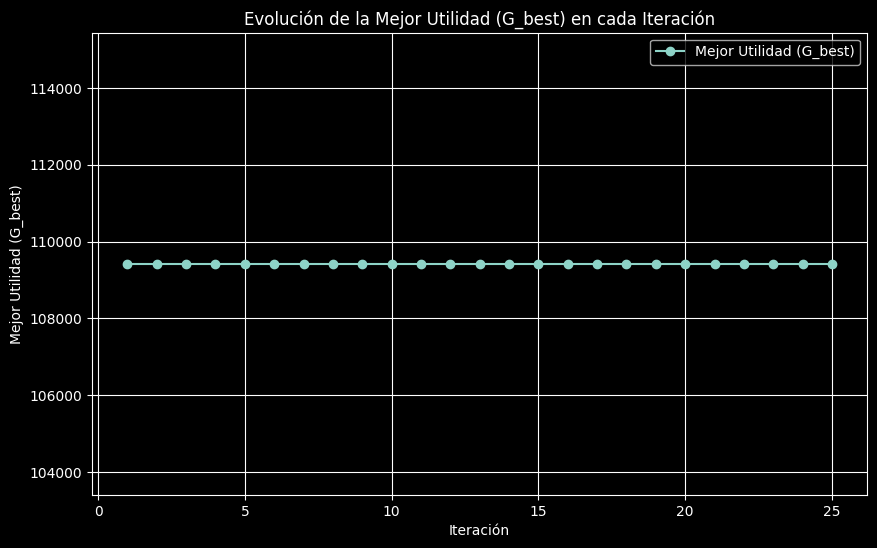

Mejor configuración encontrada:
A: 26 unidades
B: 49 unidades
C: 176 unidades
D: 8 unidades
Capacidad de fabricación usada: 638.5/640
Capacidad de acabado usada: 733.0/960
Utilidad máxima alcanzada: 109425.00


In [28]:
# Modificamos tiempo de acabado de B
acabados = np.array([3.5, 2, 3, 2])          # Tiempo de acabados en hr/100 unidades

# Volvemos a ejecutar PSO con el nuevo tiempo de acabado de B
pso_optimizacion(fabricacion, acabados, utilidad, capacidad_fabricacion, capacidad_acabados, num_particulas, max_iter, w, c1, c2)


### Ejercicio 2

Un fabricante de equipos de cómputo produce dos tipos de impresoras (impresoras de tipo 1 e impresoras de tipo 2). Los recursos necesarios para producirlas así como las utilidades correspondientes son los que siguen:

| Equipo        | Capital ($/unidad) | Mano de obra (hrs/unidad) | Utilidad ($/unidad) |
|---------------|--------------------|---------------------------|---------------------|
| Impresora 1   | 300                | 20                        | 500                 |
| Impresora 2   | 400                | 10                        | 400                 |

Si cada día se dispone de $127000 de capital y 4270 horas de mano de obra, ¿qué cantidad de cada equipo debe producirse a diario a fin de maximizar la utilidad? Escriba el algoritmo PSO con restricciones (sin usar bibliotecas para PSO) que permita optimizar la utilidad y resolver cumpliendo con las siguientes consignas:


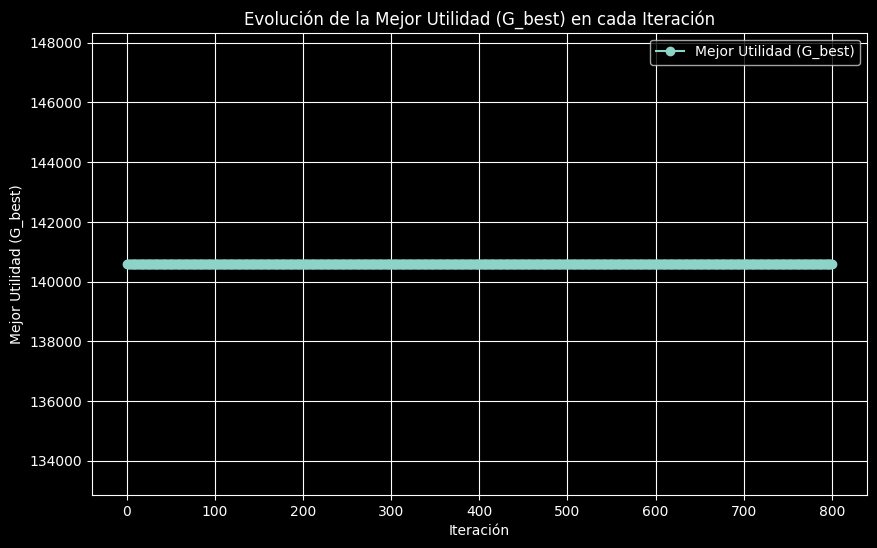

Mejor configuración encontrada:
Impresora 1: 70 unidades
Impresora 2: 264 unidades
Utilidad máxima alcanzada: 140600.00
Capital usado: 126600/127000
Mano de obra usada: 4040/4270


In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Definimos una función para poder ejecutar el algoritmo con distintos parámetros:
def pso_optimizacion_impresoras(capital, mano_obra, utilidad, capacidad_capital, capacidad_mano_obra, 
                                num_particulas=30, max_iter=100, w=0.3, c1=1.5, c2=1.5):
    equipos = ['Impresora 1', 'Impresora 2']

    # Inicialización de las partículas
    X = np.random.randint(0, 1000, (num_particulas, len(equipos)))  # Posiciones de las partículas (número de unidades de cada equipo)
    V = np.zeros_like(X)  # Velocidades de las partículas
    P_best = X.copy()     # Mejores posiciones personales
    G_best = X[np.argmax([np.dot(utilidad, P_best[i]) for i in range(num_particulas)])]  # Mejor posición global

    # Almacenar la evolución de G_best en cada iteración
    g_best_history = []

    # Evaluación de la utilidad con penalización estricta
    def evaluar_utilidad(particulas):
        utilidad_total = np.dot(particulas, utilidad)
        
        # Cálculo de recursos totales
        capital_total = np.dot(particulas, capital)
        mano_obra_total = np.dot(particulas, mano_obra)
        
        # Penalización estricta si exceden las capacidades
        penalizacion = 0
        if capital_total > capacidad_capital:
            penalizacion += (capital_total - capacidad_capital) * 50
        if mano_obra_total > capacidad_mano_obra:
            penalizacion += (mano_obra_total - capacidad_mano_obra) * 50
        
        return utilidad_total - penalizacion

    # PSO
    for iteracion in range(max_iter):
        # Actualización de las posiciones y velocidades
        for i in range(num_particulas):
            r1 = np.random.random(len(equipos))
            r2 = np.random.random(len(equipos))
            
            V[i] = (w * V[i] + 
                    c1 * r1 * (P_best[i] - X[i]) + 
                    c2 * r2 * (G_best - X[i]))
            
            X[i] = np.clip(X[i] + V[i], 0, 200)  # Aumentamos el límite superior a 200
            
            # Actualización del mejor valor personal
            if evaluar_utilidad(X[i]) > evaluar_utilidad(P_best[i]):
                P_best[i] = X[i]
        
        # Actualización del mejor valor global
        mejor_particula = np.argmax([evaluar_utilidad(P_best[i]) for i in range(num_particulas)])
        if evaluar_utilidad(P_best[mejor_particula]) > evaluar_utilidad(G_best):
            G_best = P_best[mejor_particula]
        
        # Almacenar el mejor valor global de esta iteración
        g_best_history.append(evaluar_utilidad(G_best))

    # Gráfico de la evolución de G_best
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_iter + 1), g_best_history, label='Mejor Utilidad (G_best)', marker='o')
    plt.xlabel('Iteración')
    plt.ylabel('Mejor Utilidad (G_best)')
    plt.title('Evolución de la Mejor Utilidad (G_best) en cada Iteración')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Resultado final
    print("Mejor configuración encontrada:")
    for i, equipo in enumerate(equipos):
        print(f"{equipo}: {int(G_best[i])} unidades")

    print(f"Utilidad máxima alcanzada: {evaluar_utilidad(G_best):.2f}")
    print(f"Capital usado: {np.dot(G_best,capital)}/{capacidad_capital}")
    print(f"Mano de obra usada: {np.dot(G_best,mano_obra)}/{capacidad_mano_obra}")

# Parámetros del problema de las impresoras
capital = np.array([300, 400])  # Capital en $/unidad
mano_obra = np.array([20, 10])  # Mano de obra en hrs/unidad
utilidad = np.array([500, 400])  # Utilidad en $/unidad
capacidad_capital = 127000  # Capacidad de capital en $
capacidad_mano_obra = 4270  # Capacidad de mano de obra en horas

num_particulas = 100
max_iter = 800
w = 0.1
c1 = 2
c2 = 2

# Ejecutar PSO con los parámetros del problema de las impresoras y parámetros propios del PSO ajustables
pso_optimizacion_impresoras(capital, mano_obra, utilidad, capacidad_capital, capacidad_mano_obra, 
                            num_particulas, max_iter, w, c1, c2)


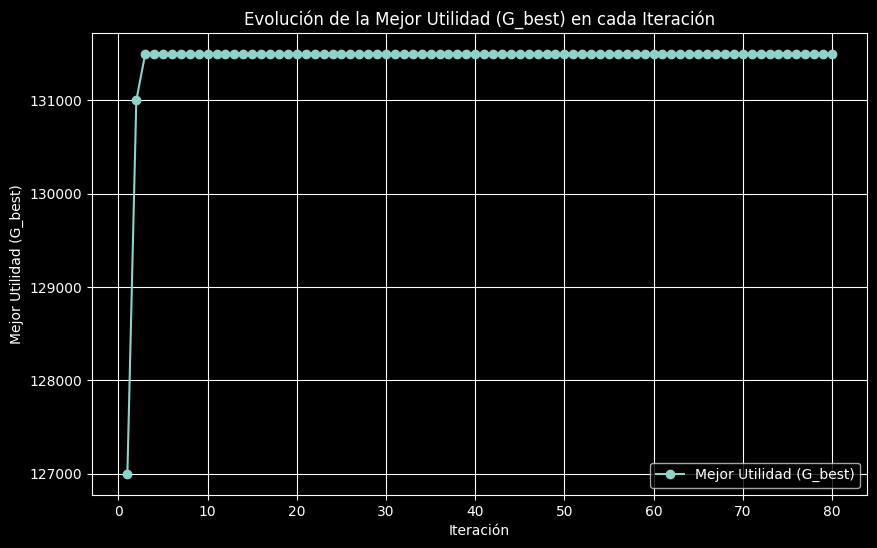

Mejor configuración encontrada:
Impresora 1: 104 unidades
Impresora 2: 200 unidades
Utilidad máxima alcanzada: 131500.00
Capital usado: 111200/127000
Mano de obra usada: 4280/4270


In [24]:
# Aumentamos las horas requeridas para producir la impresora 2
mano_obra = np.array([20, 11])  # Mano de obra en hrs/unidad

# Vemos que ocurre con el nuevo coste temporal:
pso_optimizacion_impresoras(capital, mano_obra, utilidad, capacidad_capital, capacidad_mano_obra, 
                            num_particulas, max_iter, w, c1, c2)
